In [3]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
#import xgboost
from textblob import TextBlob

In [4]:
df=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/WomensClothingReviewsData.xlsx')

In [5]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [6]:
df.shape

(23486, 11)

# Basic EDA

In [7]:
df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [8]:
df.dropna(subset=['Review Text','Review Title'],inplace=True)

In [9]:
df.isnull().sum()

Product ID         0
Category          13
Subcategory1      13
SubCategory2      13
Location           0
Channel            0
Customer Age       0
Review Title       0
Review Text        0
Rating             0
Recommend Flag     0
dtype: int64

In [10]:
df.Subcategory1.value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Subcategory1, dtype: int64

In [11]:
# Filling missing values with the mode of each variable

df['Subcategory1'].fillna('Tops', inplace = True)
df['SubCategory2'].fillna('Tops', inplace = True)
df['Category'].fillna('Dresses', inplace = True)

In [12]:
df.Category.isna().sum()

0

In [13]:
df['Review Text'] = df['Review Text'].astype(str)
df['Review Title'] = df['Review Title'].astype(str)

In [14]:
df['Review Text'] 

2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 19675, dtype: object

# Sentiment Analysis

In [15]:
df['Review_text_sentiment'] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity )
df['Review_title_sentiment'] = df["Review Title"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [16]:
df.tail()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Review_text_sentiment,Review_title_sentiment
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0.552667,0.650
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0.091667,0.000
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,0.414286,0.500
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,0.322222,0.825
23485,1104,General Petite,Dresses,Dresses,Chennai,Mobile,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,0.413889,0.625


In [17]:
df['Review_text_sentiment'].describe()

count    19675.000000
mean         0.246610
std          0.173307
min         -0.975000
25%          0.138889
50%          0.236995
75%          0.346429
max          1.000000
Name: Review_text_sentiment, dtype: float64

In [18]:
df['sentiment'] = np.where(df.Review_text_sentiment>0.30,'Very Positive',np.where(df.Review_text_sentiment>=0.20,'Positive',np.where(df.Review_text_sentiment<=-0.20,'Very Negative',np.where(df.Review_text_sentiment<=0.10, 'Negative','Neutral'))))

In [19]:
df.Review_text_sentiment.describe()

count    19675.000000
mean         0.246610
std          0.173307
min         -0.975000
25%          0.138889
50%          0.236995
75%          0.346429
max          1.000000
Name: Review_text_sentiment, dtype: float64

In [20]:
pd.crosstab(df.Rating, df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
Rating,,,,,
1,323,165,104,39,60
2,570,345,241,42,162
3,752,725,571,26,390
4,772,1184,1169,9,1155
5,926,1994,2964,12,4975


In [21]:
Positive_review = df['Review Text'][df.Rating>=4].astype(str)
Negative_review = df['Review Text'][df.Rating<4].astype(str)

In [22]:
Positive_review

3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
8        I love this dress. i usually get an xs but it ...
                               ...                        
23476    These bottoms are very cute but defiantly chee...
23477    I'm so impressed with the beautiful color comb...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 15160, dtype: object

# Data Cleaning

In [23]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    #text = text.replace('return factor',"return factor").replace('cons','')
    # text = re.sub(r' +', '', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [24]:
Positive_review = Positive_review.apply(clean_text)
Negative_review = Negative_review.apply(clean_text)

In [25]:
Positive_review

3        i love love love this jumpsuit its fun flirty ...
4        this shirt is very flattering to all due to th...
6        i aded this in my basket at hte last mintue to...
7        i ordered this in carbon for store pick up and...
8        i love this dress i usually get an xs but it r...
                               ...                        
23476    these bottoms are very cute but defiantly chee...
23477    im so impressed with the beautiful color combi...
23479    so i wasnt sure about ordering this skirt beca...
23481    i was very happy to snag this dress at such a ...
23485    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 15160, dtype: object

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

Stop Word Removal

In [27]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [28]:
Positive_review = pre_process(Positive_review)
Negative_review=pre_process(Negative_review)

In [29]:
Negative_review

2        high hopes dress really wanted work initially ...
5        love tracy reese dresses one petite feet tall ...
10       dress runs small esp zipper area runs ordered ...
14       nice choice holiday gatherings like length gra...
16       material color nice leg opening large length h...
                               ...                        
23475    cute dress waist high sleeves tight maybe diff...
23478    surprised positive reviews product terrible cu...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
Name: Review Text, Length: 4515, dtype: object

In [ ]:
# Stemming
#df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split()))
#df['Review Title'] = df['Review Title'].apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split()))

# Lemmitization
#df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(stemmer_func(word) for word in x.split())) 

# STOP WORD REMOVAL
#df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# WORD CLOUDS and Top Key Words

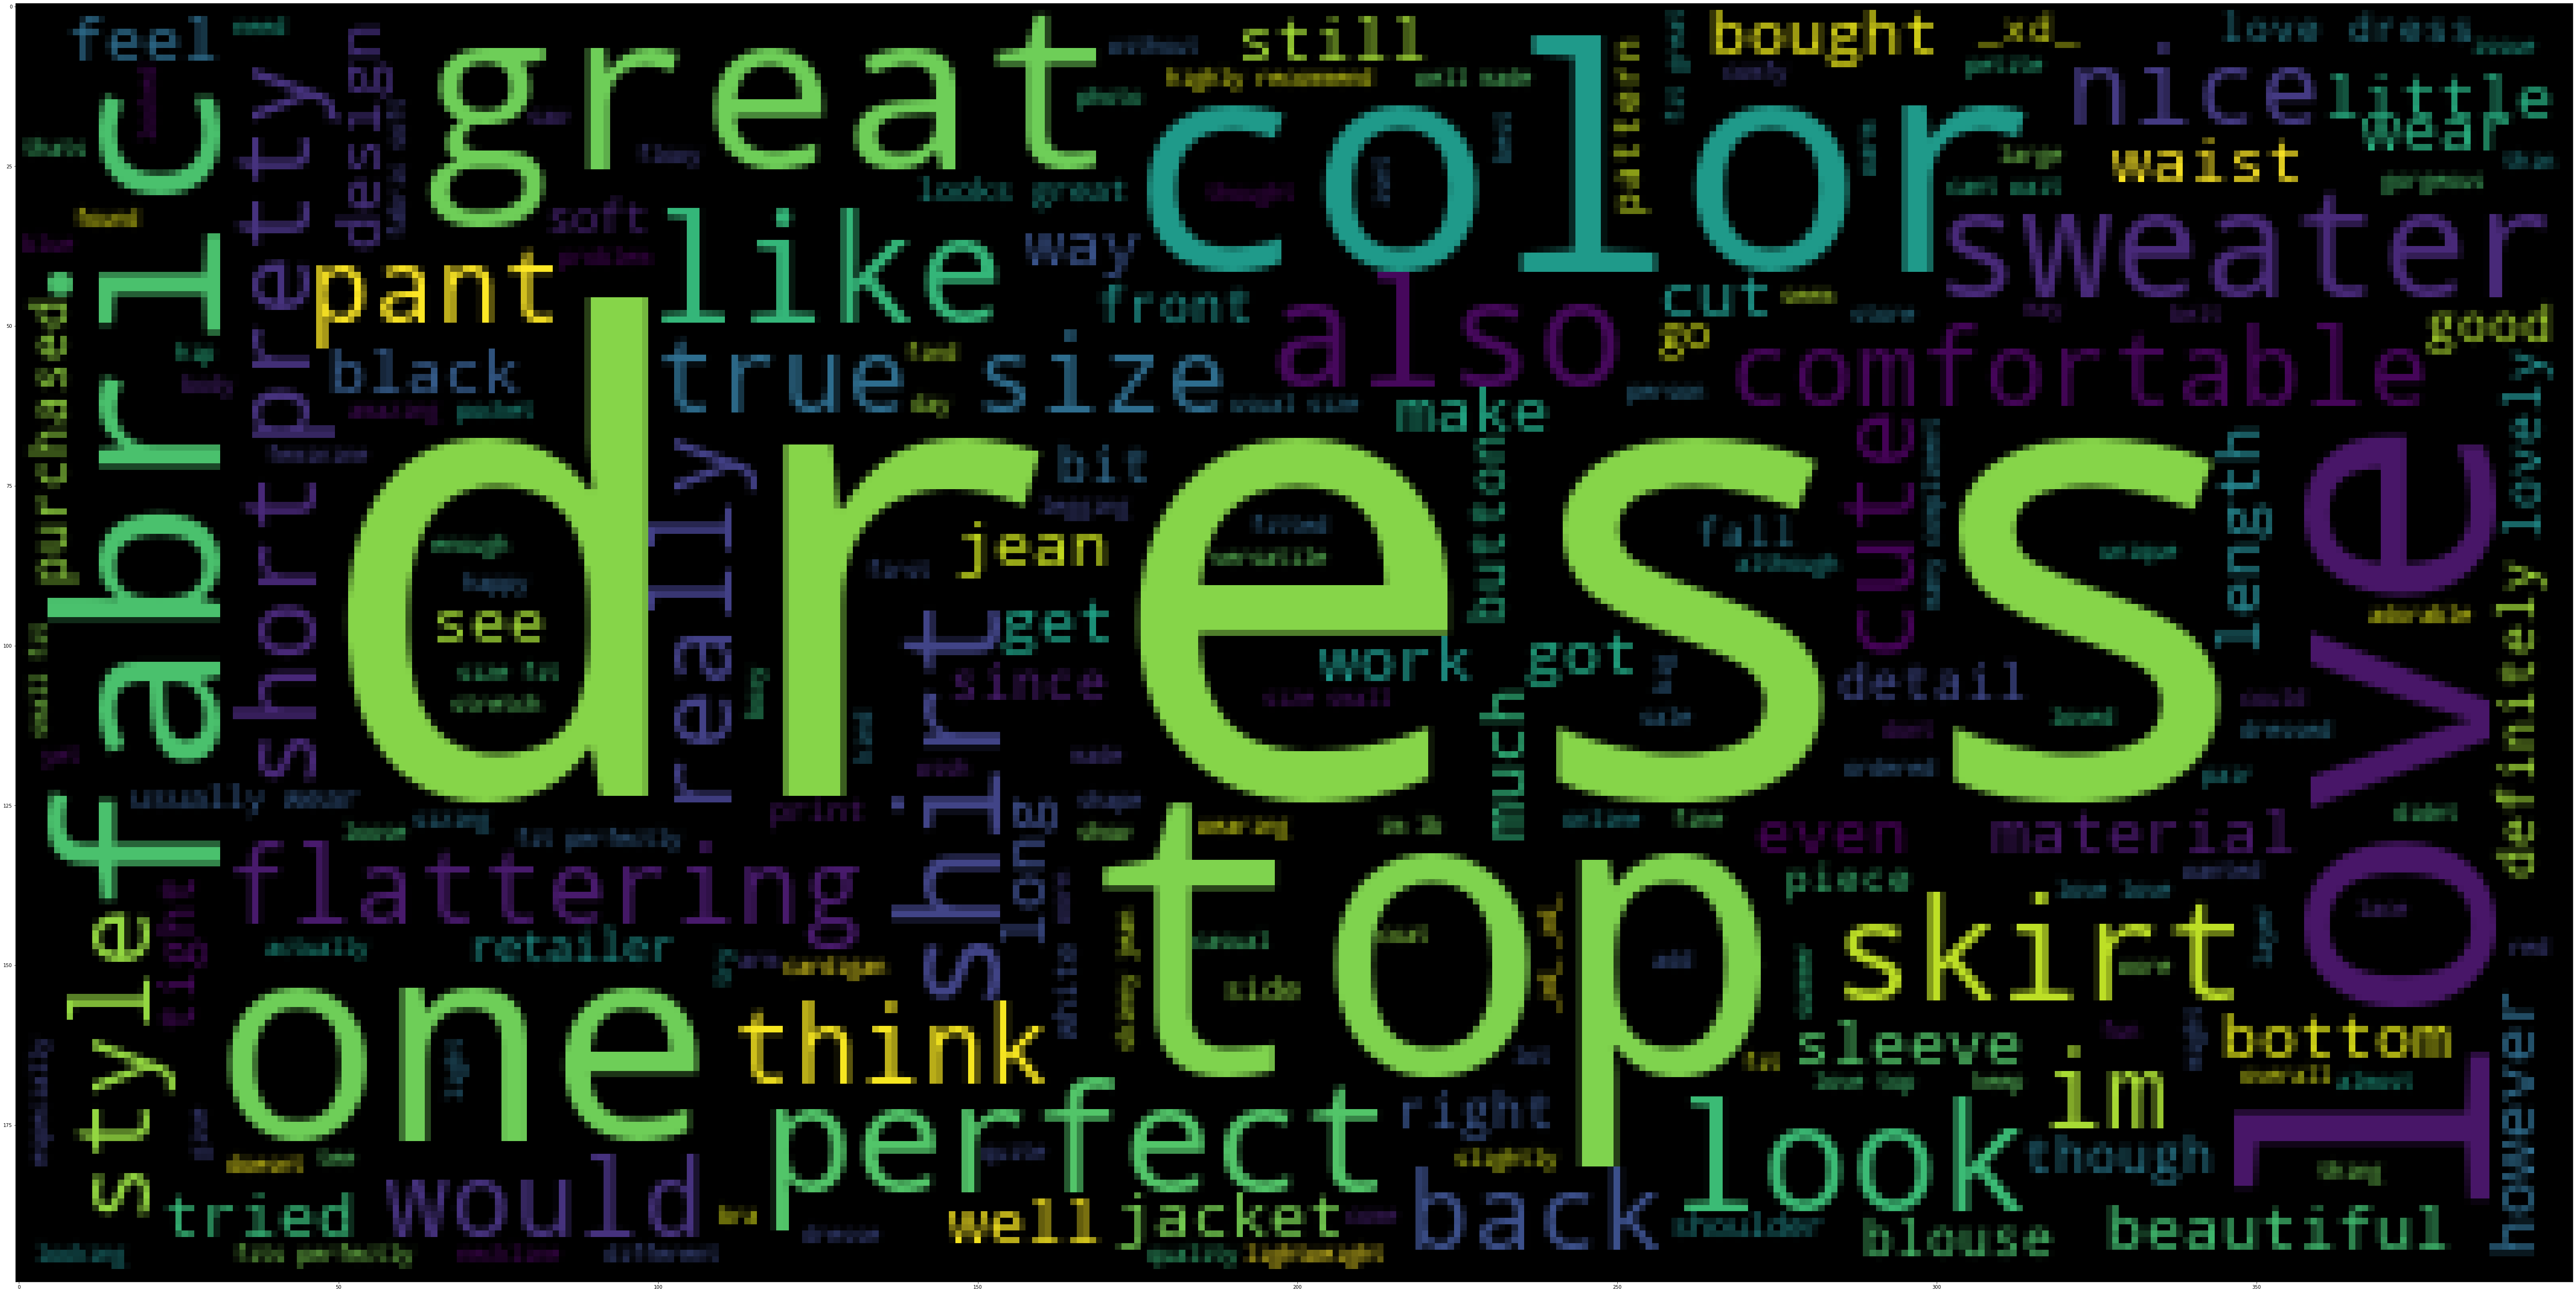

In [29]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

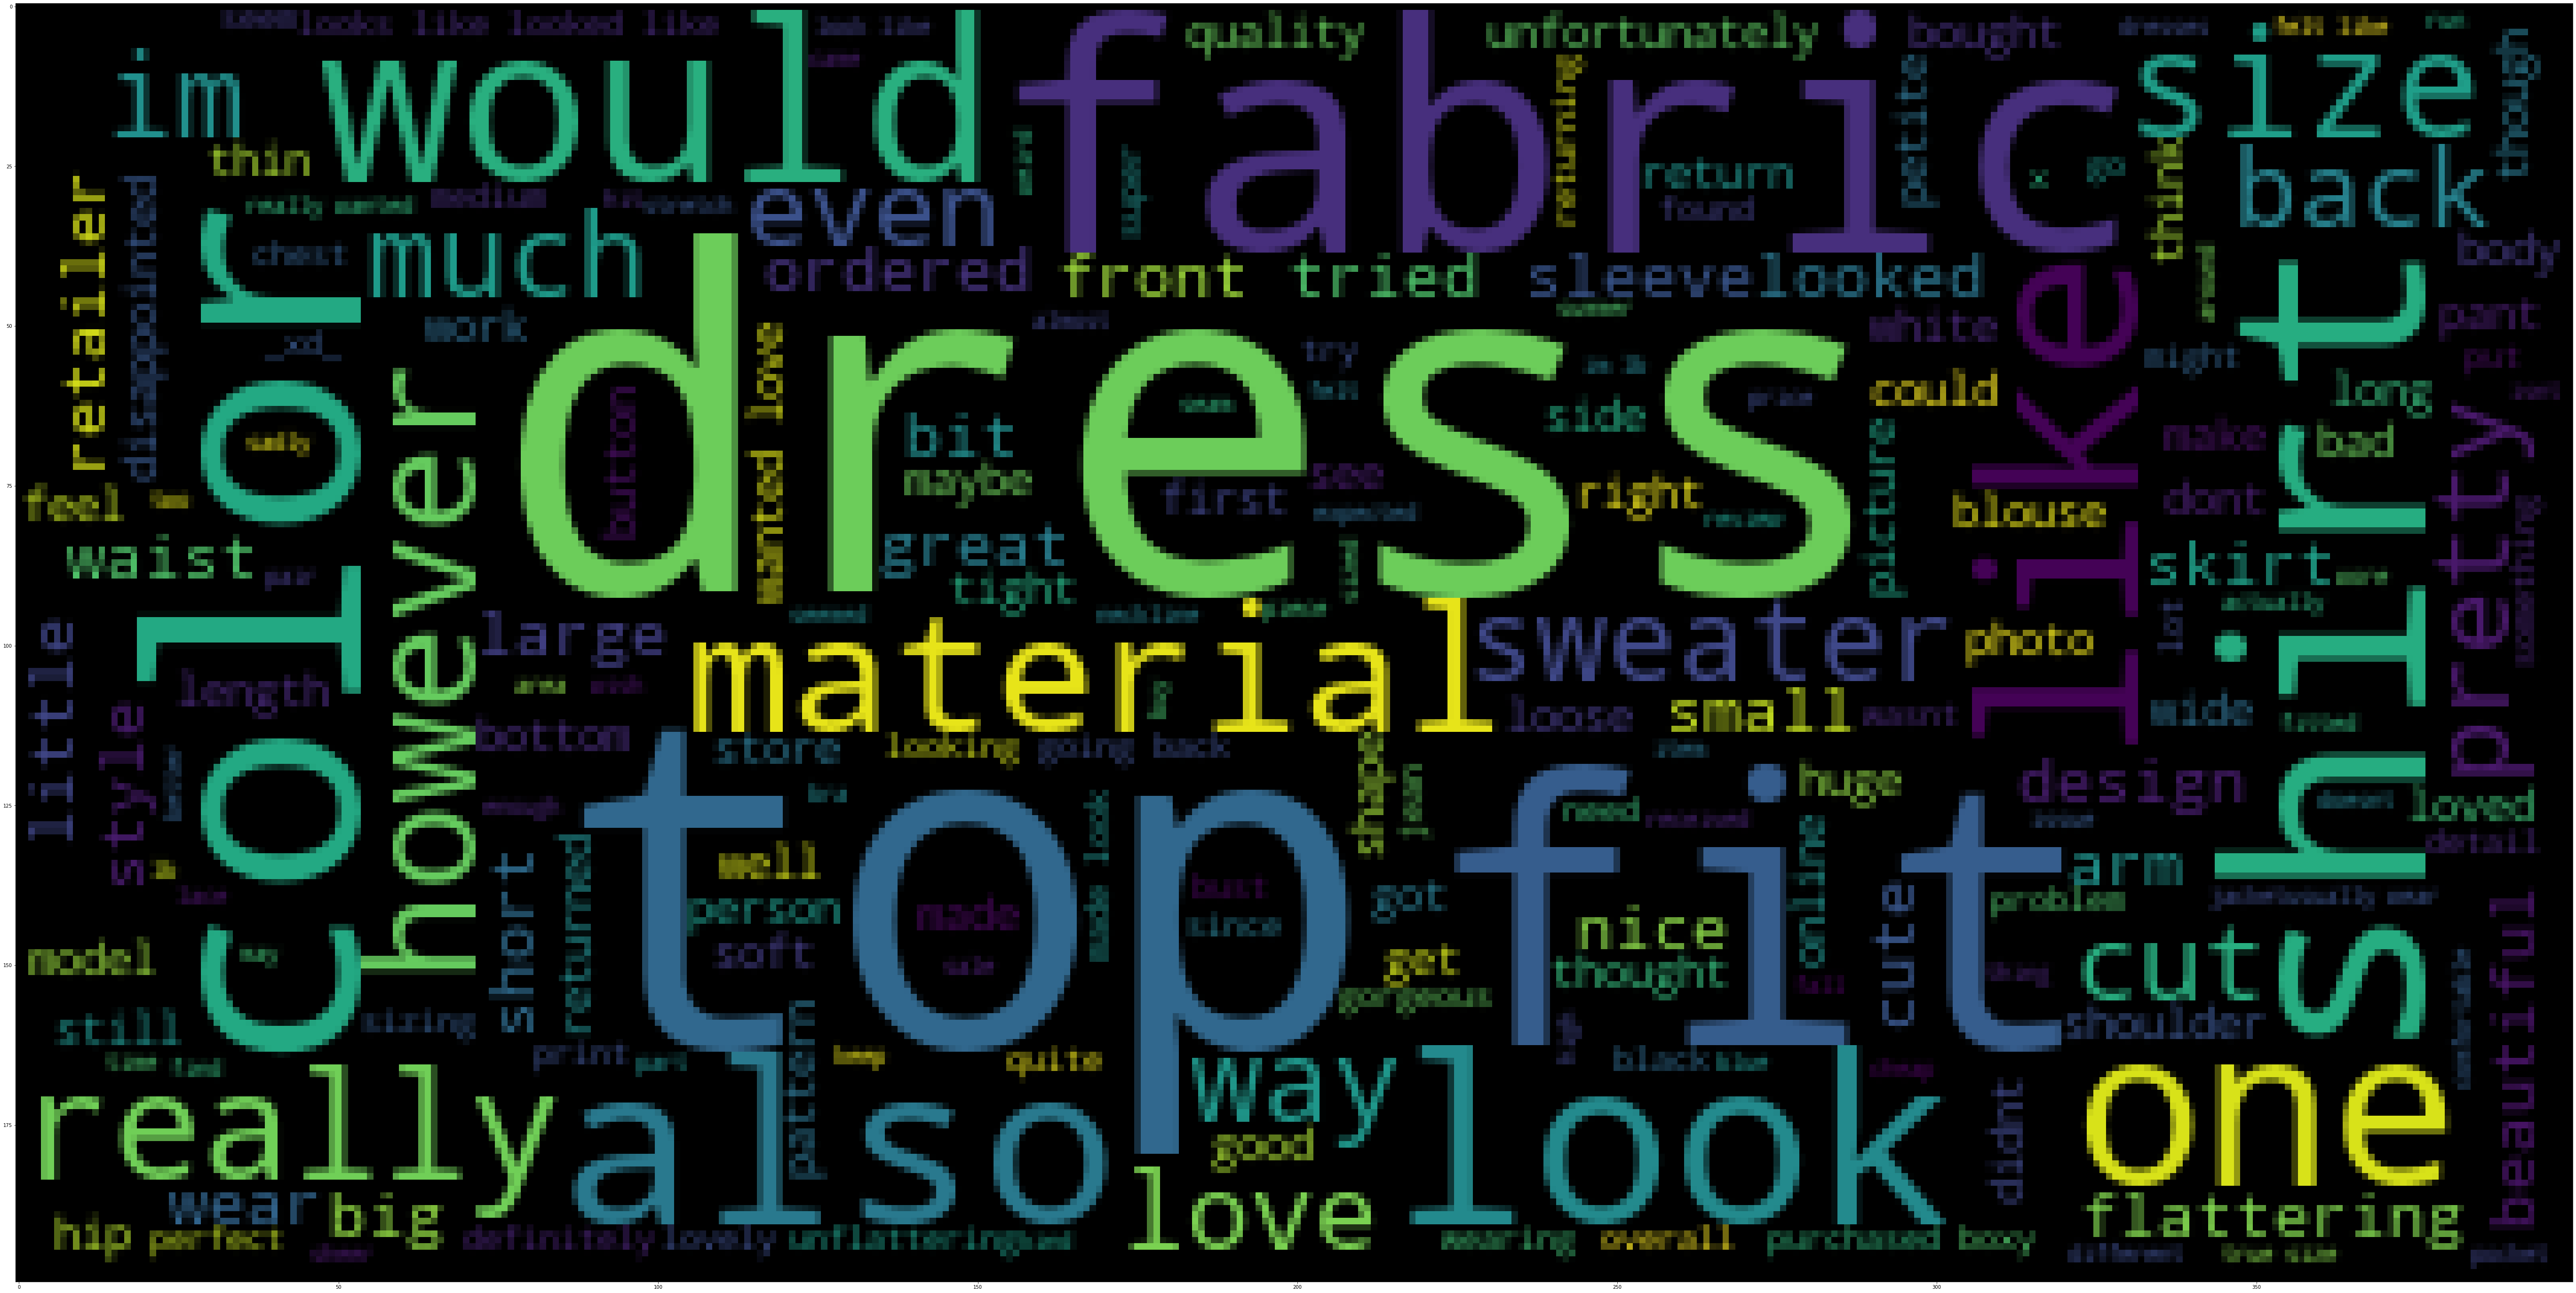

In [30]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [31]:
Positive_review

3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
7        ordered carbon store pick ton stuff always try...
8        love dress usually get xs runs little snug bus...
                               ...                        
23476    bottoms cute defiantly cheeky would recommend ...
23477    im impressed beautiful color combinations embr...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23485    dress lovely platinum feminine fits perfectly ...
Name: Review Text, Length: 15160, dtype: object

In [32]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [33]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

In [34]:
Negative_review[5]

'love tracy reese dresses one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'

<AxesSubplot:>

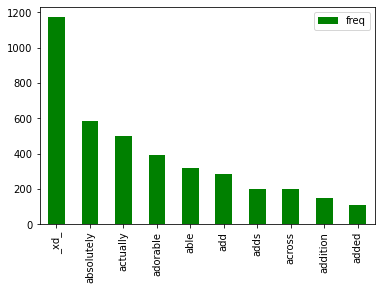

In [35]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

#fig = plt.figure(figsize=(200,50))

# Sentiment Ananlysis among customers on different categories, sub-categories, products by location and age group

In [30]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Review_text_sentiment,Review_title_sentiment,sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,0.0625,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,0.6250,Very Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,0.0000,Very Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,0.2000,Neutral
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,0.3000,Neutral


In [31]:
pd.crosstab(df.Category, df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
Category,,,,,
Dresses,0,7,1,0,5
General,1970,2636,3052,84,3922
General Petite,1138,1504,1728,37,2371
Initmates,235,266,268,7,444


General and General Petite categories have the maximum reviews out of which maximum reviews belong to the groups of positive
and very positive reviews. Overall, dresses have no negative reviews while general group has the maximum negative reviews,
followed by general petite

In [31]:
pd.crosstab(df.Subcategory1, df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
Subcategory1,,,,,
Bottoms,540,691,795,19,1139
Dresses,916,1248,1382,31,1794
Intimate,278,306,305,8,511
Jackets,168,216,201,5,289
Tops,1416,1927,2345,63,2975
Trend,25,25,21,2,34


1. Tops and Dresses have the maximum positive reviews followed by Bottoms. This shows that there has been very less sale of other
   items like Jackets, Intimate wear and Trending clothes.

2. Similar trend follows in the negative reviews as well. Overall there are very few reviews that are very negative, suggesting
that the overall customer sentiment is inclining on the positive side



In [32]:
pd.crosstab(df.SubCategory2, df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
SubCategory2,,,,,
Blouses,406,547,749,10,875
Casual bottoms,0,0,0,0,1
Chemises,0,0,0,0,1
Dresses,916,1248,1382,31,1794
Fine gauge,151,209,247,10,310
Intimates,14,24,31,3,48
Jackets,106,147,138,4,203
Jeans,158,206,258,5,343
Knits,649,885,1020,31,1396


1. Within Tops, Customer sentiments on blouses and sweaters are generally positive. However, blouses also have a higher
negative sentiment as compared to other items in upper wear segment.
2. Within Bottoms, Customer sentiments on Jeans, Pants and Skirts are generally found to be positive, suggesting that
customers prefer to buy more of these items. Pants however, have a high number of negative sentiments among customers.
3. Overall, dresses and knits have the highest negative sentiment


In [184]:
pd.crosstab(df['Location'], df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
Location,,,,,
Bangalore,754,1038,1115,27,1473
Chennai,356,460,482,14,650
Gurgaon,1252,1593,1886,48,2587
Mumbai,981,1322,1566,39,2032


Maximum number of sales have happened in the cities of Mumbai and Gurgaon with least amount of sales in Chennai.
This suggests that major customer segments are coming from these cities and Mumbai in particular has a higher positive sentiment as compared to other cities. Gurgaon on the other hand, has the highest negative sentiment

In [39]:
pd.crosstab(df['Customer Age'], df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
Customer Age,,,,,
18,1,3,0,0,0
19,2,6,11,0,9
20,12,14,29,0,36
21,13,9,20,0,33
22,20,24,31,0,31
...,...,...,...,...,...
91,2,0,0,0,1
92,0,0,1,0,0
93,0,0,0,0,2


In [40]:
df['Customer Age'].describe()

count    19675.000000
mean        43.257942
std         12.256779
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Customer Age, dtype: float64

In [ ]:
Binning the customer age into different groups

In [32]:
df['cutomer age group']=np.where(df['Customer Age']<25,'18-25', np.where(df['Customer Age']<35,'25-35',np.where(df['Customer Age']<50,'35-50','More than 50')))

In [33]:
df['cutomer age group'].value_counts()

35-50           8951
More than 50    5651
25-35           4357
18-25            716
Name: cutomer age group, dtype: int64

In [34]:
pd.crosstab(df['cutomer age group'], df.sentiment)

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
cutomer age group,,,,,
18-25,102,145,204,4,261
25-35,716,990,1130,33,1488
35-50,1589,2024,2267,55,3016
More than 50,936,1254,1448,36,1977


People in the age group of 35-50 are maximum and the least in the younger age group of 18-25. Overall, the sentiment is leaning
on the positive side for all age groups.

# Text Classification

1. Predicting Rating Based on the Review
2. Predicting which customers are recommending products

# Predicting Rating Based on the Review

In [35]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Review_text_sentiment,Review_title_sentiment,sentiment,cutomer age group
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,0.0625,Negative,More than 50
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,0.6250,Very Positive,More than 50
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,0.0000,Very Positive,35-50
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,0.2000,Neutral,35-50
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,0.3000,Neutral,35-50


In [36]:
df['Rating_new'] = np.where(df.Rating>=4, 1,0)

In [37]:
X=df['Review Text']
Y=df.Rating

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [39]:
train_X = train_X.apply(lambda x: clean_text(x))
train_X = pre_process(train_X)

test_X = test_X.apply(lambda x: clean_text(x))
test_X=pre_process(test_X)

In [40]:
train_X

786      haha unifying theme reviews seems dont trust p...
18097    always hope dress looks like pictured would sa...
20753    local retailer weekend needing bathing suit up...
4543     love good flowy blouses like sized look one di...
2407     love piece fits well comfortable dress casual ...
                               ...                        
16066    great summer pants real wide leg fit perfect e...
9281     surprised retailer decided ship sweater sweate...
18358    love dress fact loved enough get altered would...
21170    wanted romper bad buying loving shirt madewell...
18776    promised one pair joggers year ones went blue ...
Name: Review Text, Length: 13772, dtype: object

In [41]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [42]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
from sklearn.svm import LinearSVC

In [44]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [45]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.77      0.50      0.61       495
           2       0.63      0.40      0.49       981
           3       0.58      0.50      0.54      1716
           4       0.56      0.36      0.44      2972
           5       0.76      0.94      0.84      7608

    accuracy                           0.71     13772
   macro avg       0.66      0.54      0.58     13772
weighted avg       0.69      0.71      0.68     13772

              precision    recall  f1-score   support

           1       0.23      0.14      0.18       196
           2       0.28      0.18      0.22       379
           3       0.41      0.33      0.37       748
           4       0.43      0.27      0.33      1317
           5       0.73      0.92      0.81      3263

    accuracy                           0.62      5903
   macro avg       0.42      0.37      0.38      5903
weighted avg       0.58      0.62      0.59      5903



In [46]:
lsvc_model.predict(dtm_tfidf_test)

array([5, 5, 3, ..., 4, 5, 5], dtype=int64)

In [47]:
train_X.head()

786      haha unifying theme reviews seems dont trust p...
18097    always hope dress looks like pictured would sa...
20753    local retailer weekend needing bathing suit up...
4543     love good flowy blouses like sized look one di...
2407     love piece fits well comfortable dress casual ...
Name: Review Text, dtype: object

In [48]:
train_X.reset_index()

,index,Review Text
0,786,haha unifying theme reviews seems dont trust p...
1,18097,always hope dress looks like pictured would sa...
2,20753,local retailer weekend needing bathing suit up...
3,4543,love good flowy blouses like sized look one di...
4,2407,love piece fits well comfortable dress casual ...
...,...,...
13767,16066,great summer pants real wide leg fit perfect e...
13768,9281,surprised retailer decided ship sweater sweate...
13769,18358,love dress fact loved enough get altered would...
13770,21170,wanted romper bad buying loving shirt madewell...


In [49]:
pd.concat([train_X.reset_index(), dtm_tfidf_train],axis=1)

,index,Review Text,_xd_,able,absolutely,across,actually,add,added,addition,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,786,haha unifying theme reviews seems dont trust p...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,18097,always hope dress looks like pictured would sa...,0.148694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,20753,local retailer weekend needing bathing suit up...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,4543,love good flowy blouses like sized look one di...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,2407,love piece fits well comfortable dress casual ...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,16066,great summer pants real wide leg fit perfect e...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13768,9281,surprised retailer decided ship sweater sweate...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13769,18358,love dress fact loved enough get altered would...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13770,21170,wanted romper bad buying loving shirt madewell...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175622,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [50]:
dtm_tfidf_train

,_xd_,able,absolutely,across,actually,add,added,addition,adds,adorable,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.148694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13768,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13770,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.175622,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Predicting Which Customers are recommending the Products

In [62]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Review_text_sentiment,Review_title_sentiment,sentiment,cutomer age group,Rating_new
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,0.0625,Negative,More than 50,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,0.6250,Very Positive,More than 50,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.512891,0.0000,Very Positive,35-50,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.178750,0.2000,Neutral,35-50,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,0.3000,Neutral,35-50,1


In [78]:
X1=df['Review Text']
Y1=df['Recommend Flag']

In [79]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, Y1, test_size=0.3, random_state=123)

In [80]:
train_X1 = train_X1.apply(lambda x: clean_text(x))
train_X1 = pre_process(train_X1)

test_X1 = test_X1.apply(lambda x: clean_text(x))
test_X1=pre_process(test_X1)

In [81]:
train_y1

786      1
18097    1
20753    1
4543     0
2407     1
        ..
16066    1
9281     0
18358    1
21170    1
18776    1
Name: Recommend Flag, Length: 13772, dtype: int64

In [85]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf1 = tfidf_vect.fit_transform(train_X1)
X_test_tfidf1 = tfidf_vect.transform(test_X1)

In [87]:
dtm_tfidf_train1=pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test1=pd.DataFrame(X_test_tfidf1.toarray(), columns=tfidf_vect.get_feature_names())

C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [88]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train1, train_y1)

In [89]:
print(sklearn.metrics.classification_report(train_y1, lsvc_model.predict(dtm_tfidf_train1)))

print(sklearn.metrics.classification_report(test_y1, lsvc_model.predict(dtm_tfidf_test1)))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      2529
           1       0.93      0.97      0.95     11243

    accuracy                           0.91     13772
   macro avg       0.88      0.82      0.85     13772
weighted avg       0.91      0.91      0.91     13772

              precision    recall  f1-score   support

           0       0.71      0.59      0.65      1046
           1       0.92      0.95      0.93      4857

    accuracy                           0.88      5903
   macro avg       0.81      0.77      0.79      5903
weighted avg       0.88      0.88      0.88      5903



In [90]:
lsvc_model.predict(dtm_tfidf_test)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
train_X.reset_index()

,index,Review Text
0,786,haha unifying theme reviews seems dont trust p...
1,18097,always hope dress looks like pictured would sa...
2,20753,local retailer weekend needing bathing suit up...
3,4543,love good flowy blouses like sized look one di...
4,2407,love piece fits well comfortable dress casual ...
...,...,...
13767,16066,great summer pants real wide leg fit perfect e...
13768,9281,surprised retailer decided ship sweater sweate...
13769,18358,love dress fact loved enough get altered would...
13770,21170,wanted romper bad buying loving shirt madewell...


In [92]:
pd.concat([train_X1.reset_index(), dtm_tfidf_train1],axis=1)

,index,Review Text,_xd_,able,absolutely,across,actually,add,added,addition,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,786,haha unifying theme reviews seems dont trust p...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,18097,always hope dress looks like pictured would sa...,0.148694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,20753,local retailer weekend needing bathing suit up...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,4543,love good flowy blouses like sized look one di...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,2407,love piece fits well comfortable dress casual ...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,16066,great summer pants real wide leg fit perfect e...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13768,9281,surprised retailer decided ship sweater sweate...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13769,18358,love dress fact loved enough get altered would...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13770,21170,wanted romper bad buying loving shirt madewell...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175622,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Text Recommendation (Similarity between documents)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
dist = cosine_similarity(dtm_tfidf_train)

In [52]:
train_X

786      haha unifying theme reviews seems dont trust p...
18097    always hope dress looks like pictured would sa...
20753    local retailer weekend needing bathing suit up...
4543     love good flowy blouses like sized look one di...
2407     love piece fits well comfortable dress casual ...
                               ...                        
16066    great summer pants real wide leg fit perfect e...
9281     surprised retailer decided ship sweater sweate...
18358    love dress fact loved enough get altered would...
21170    wanted romper bad buying loving shirt madewell...
18776    promised one pair joggers year ones went blue ...
Name: Review Text, Length: 13772, dtype: object

In [53]:
dist

array([[1.        , 0.        , 0.04220406, ..., 0.02596762, 0.01517633,
        0.        ],
       [0.        , 1.        , 0.01209756, ..., 0.10635123, 0.01356551,
        0.        ],
       [0.04220406, 0.01209756, 1.        , ..., 0.08831315, 0.02646122,
        0.05837777],
       ...,
       [0.02596762, 0.10635123, 0.08831315, ..., 1.        , 0.02571384,
        0.05449828],
       [0.01517633, 0.01356551, 0.02646122, ..., 0.02571384, 1.        ,
        0.10125304],
       [0.        , 0.        , 0.05837777, ..., 0.05449828, 0.10125304,
        1.        ]])

In [54]:
len(['d_'+str(i) for i in train_X.index])

13772

In [55]:
dist = pd.DataFrame(dist, index =  train_X.index, columns = ['d_'+str(i) for i in train_X.index])

In [56]:
dist

,d_786,d_18097,d_20753,d_4543,d_2407,d_20204,d_21459,d_14035,d_19610,d_4608,...,d_4194,d_146,d_1148,d_6767,d_125,d_16066,d_9281,d_18358,d_21170,d_18776
786,1.000000,0.000000,0.042204,0.059756,0.000000,0.082515,0.013398,0.045320,0.032700,0.074428,...,0.000000,0.000000,0.000000,0.091637,0.008739,0.000000,0.076639,0.025968,0.015176,0.000000
18097,0.000000,1.000000,0.012098,0.051159,0.048082,0.038537,0.084247,0.159260,0.095882,0.055952,...,0.023752,0.108321,0.000000,0.045626,0.125639,0.071059,0.089609,0.106351,0.013566,0.000000
20753,0.042204,0.012098,1.000000,0.040123,0.000000,0.029940,0.075994,0.021680,0.000000,0.025381,...,0.000000,0.014523,0.035645,0.040146,0.038777,0.047715,0.027328,0.088313,0.026461,0.058378
4543,0.059756,0.051159,0.040123,1.000000,0.012286,0.000000,0.046313,0.059520,0.013363,0.151582,...,0.057243,0.010033,0.046022,0.056543,0.034749,0.013062,0.031907,0.031078,0.057500,0.054672
2407,0.000000,0.048082,0.000000,0.012286,1.000000,0.000000,0.064604,0.034819,0.021937,0.021561,...,0.000000,0.024255,0.021414,0.028988,0.138726,0.000000,0.000000,0.083255,0.000000,0.033657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,0.000000,0.071059,0.047715,0.013062,0.000000,0.000000,0.188286,0.050098,0.000000,0.020562,...,0.034000,0.045550,0.038881,0.078100,0.042833,1.000000,0.042337,0.039353,0.057169,0.078741
9281,0.076639,0.089609,0.027328,0.031907,0.000000,0.037557,0.065488,0.026745,0.000000,0.067060,...,0.023148,0.000000,0.027417,0.000000,0.029596,0.042337,1.000000,0.024474,0.041160,0.000000
18358,0.025968,0.106351,0.088313,0.031078,0.083255,0.071553,0.088164,0.112663,0.083996,0.059377,...,0.043598,0.065520,0.023380,0.043906,0.095244,0.039353,0.024474,1.000000,0.025714,0.054498
21170,0.015176,0.013566,0.026461,0.057500,0.000000,0.051934,0.111311,0.062713,0.025118,0.165786,...,0.146588,0.040587,0.053631,0.021463,0.060334,0.057169,0.041160,0.025714,1.000000,0.101253


In [57]:
#Original Document
train_X[786]

'haha unifying theme reviews seems dont trust picture misled neckline thought saw structured kind asianinspired mockneckfunnel thing instead top foldover cowl full bust underneath refuses pose mockneck overall isnt much structure print beautiful sweater cozy without itchy'

In [58]:
top_recs = dist.sort_values(by='d_786', ascending=False)['d_786'][1:6]   #Top 5 documents for given document-3144

In [59]:
top_recs

12431    0.262853
14766    0.231816
20462    0.217360
16628    0.215693
22456    0.215539
Name: d_786, dtype: float64

In [60]:
train_X[12431]

'love sweater perfect chilly florida eveningslove loose boxy shape cozy itchy'

In [61]:
train_X[14766]

'dress comfortable cute wear xs true size thing dont like neckline low cut wear cami underneath'

# Topic Mining

In [93]:
# Importing Gensim
import gensim
from gensim import corpora

In [94]:
train_X

786      haha unifying theme reviews seems dont trust p...
18097    always hope dress looks like pictured would sa...
20753    local retailer weekend needing bathing suit up...
4543     love good flowy blouses like sized look one di...
2407     love piece fits well comfortable dress casual ...
                               ...                        
16066    great summer pants real wide leg fit perfect e...
9281     surprised retailer decided ship sweater sweate...
18358    love dress fact loved enough get altered would...
21170    wanted romper bad buying loving shirt madewell...
18776    promised one pair joggers year ones went blue ...
Name: Review Text, Length: 13772, dtype: object

In [95]:
X_train_tokens = [doc.split() for doc in train_X]  

In [96]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)


Dictionary(14860 unique tokens: ['asianinspired', 'beautiful', 'bust', 'cowl', 'cozy']...)


In [97]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [98]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [99]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary)

In [100]:
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.015*"top" + 0.011*"wear" + 0.011*"one" + 0.009*"like" + 0.007*"dress" + 0.007*"fit" + 0.007*"shirt" + 0.007*"would" + 0.006*"back" + 0.005*"white" + 0.005*"small" + 0.005*"im" + 0.005*"retailer" + 0.005*"could" + 0.004*"little" + 0.004*"first" + 0.004*"size" + 0.004*"love" + 0.004*"great" + 0.004*"wash"'), (1, '0.022*"size" + 0.018*"dress" + 0.017*"fit" + 0.016*"im" + 0.014*"top" + 0.012*"small" + 0.010*"love" + 0.009*"ordered" + 0.009*"wear" + 0.008*"like" + 0.008*"would" + 0.008*"perfect" + 0.007*"petite" + 0.007*"really" + 0.007*"medium" + 0.007*"length" + 0.007*"color" + 0.006*"great" + 0.006*"back" + 0.006*"little"'), (2, '0.025*"dress" + 0.016*"like" + 0.015*"would" + 0.013*"size" + 0.013*"look" + 0.010*"flattering" + 0.009*"fabric" + 0.009*"love" + 0.008*"fit" + 0.007*"material" + 0.007*"looks" + 0.007*"great" + 0.007*"much" + 0.006*"top" + 0.006*"really" + 0.006*"little" + 0.006*"think" + 0.006*"_xd_" + 0.006*"way" + 0.006*"fits"'), (3, '0.027*"love" + 0.019*"great" + 0

In [101]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
top wear one like dress fit shirt would back white small im retailer could little first size love great wash

Topic 2, top 20 words:
size dress fit im top small love ordered wear like would perfect petite really medium length color great back little

Topic 3, top 20 words:
dress like would size look flattering fabric love fit material looks great much top really little think _xd_ way fits

Topic 4, top 20 words:
love great top fabric wear jeans sweater like soft cute color little comfortable well skirt shirt bit look perfect really

Topic 5, top 20 words:
dress wear love like color soft comfortable great sweater size fit bought one im perfect compliments well fits many colors


In [102]:
ldamodel.print_topics(num_topics=5, num_words=20)

[(0,
  '0.015*"top" + 0.011*"wear" + 0.011*"one" + 0.009*"like" + 0.007*"dress" + 0.007*"fit" + 0.007*"shirt" + 0.007*"would" + 0.006*"back" + 0.005*"white" + 0.005*"small" + 0.005*"im" + 0.005*"retailer" + 0.005*"could" + 0.004*"little" + 0.004*"first" + 0.004*"size" + 0.004*"love" + 0.004*"great" + 0.004*"wash"'),
 (1,
  '0.022*"size" + 0.018*"dress" + 0.017*"fit" + 0.016*"im" + 0.014*"top" + 0.012*"small" + 0.010*"love" + 0.009*"ordered" + 0.009*"wear" + 0.008*"like" + 0.008*"would" + 0.008*"perfect" + 0.007*"petite" + 0.007*"really" + 0.007*"medium" + 0.007*"length" + 0.007*"color" + 0.006*"great" + 0.006*"back" + 0.006*"little"'),
 (2,
  '0.025*"dress" + 0.016*"like" + 0.015*"would" + 0.013*"size" + 0.013*"look" + 0.010*"flattering" + 0.009*"fabric" + 0.009*"love" + 0.008*"fit" + 0.007*"material" + 0.007*"looks" + 0.007*"great" + 0.007*"much" + 0.006*"top" + 0.006*"really" + 0.006*"little" + 0.006*"think" + 0.006*"_xd_" + 0.006*"way" + 0.006*"fits"'),
 (3,
  '0.027*"love" + 0.019*

In [103]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.109651774), (1, 0.5397229), (3, 0.33897662)]
doc :  1 [(2, 0.98215044)]
doc :  2 [(0, 0.91290116), (1, 0.07428433)]
doc :  3 [(1, 0.55743414), (2, 0.42213213)]
doc :  4 [(0, 0.013455514), (1, 0.013482641), (2, 0.013487113), (3, 0.013634754), (4, 0.94594)]
doc :  5 [(0, 0.93676525), (1, 0.015880262), (2, 0.015857693), (3, 0.015880505), (4, 0.015616263)]
doc :  6 [(1, 0.97067827)]
doc :  7 [(0, 0.14136495), (3, 0.6306722), (4, 0.2187961)]
doc :  8 [(0, 0.01571161), (1, 0.01587205), (2, 0.35239995), (3, 0.6002725), (4, 0.015743947)]
doc :  9 [(2, 0.28600258), (3, 0.7008324)]
doc :  10 [(1, 0.14784594), (3, 0.8393597)]
doc :  11 [(0, 0.011520107), (1, 0.17786421), (2, 0.7875798), (3, 0.011585034), (4, 0.01145095)]
doc :  12 [(0, 0.3760552), (4, 0.59542334)]
doc :  13 [(0, 0.1339536), (1, 0.015771594), (2, 0.015932633), (3, 0.81877), (4, 0.015572151)]
doc :  14 [(2, 0.9803372)]
doc :  15 [(0, 0.34569454), (1, 0.61762476), (2, 0.012237812), (3, 0.012213731), (4, 0.012229164)]

doc :  415 [(0, 0.022700377), (1, 0.022678517), (2, 0.9085492), (3, 0.023038674), (4, 0.023033237)]
doc :  416 [(0, 0.14788984), (1, 0.6453234), (4, 0.1954297)]
doc :  417 [(0, 0.011924642), (1, 0.0119159715), (2, 0.01193611), (3, 0.4696675), (4, 0.49455583)]
doc :  418 [(0, 0.027289765), (1, 0.2112787), (2, 0.014706016), (3, 0.34467545), (4, 0.40205002)]
doc :  419 [(0, 0.09450239), (1, 0.32532224), (2, 0.33227667), (3, 0.23947889)]
doc :  420 [(2, 0.48882985), (3, 0.48455968)]
doc :  421 [(0, 0.011632646), (1, 0.011359256), (2, 0.011584888), (3, 0.011507708), (4, 0.9539155)]
doc :  422 [(1, 0.5499565), (3, 0.17540206), (4, 0.25879225)]
doc :  423 [(0, 0.028962888), (1, 0.02960629), (2, 0.029199738), (3, 0.8830457), (4, 0.02918539)]
doc :  424 [(0, 0.53969234), (2, 0.3736308), (4, 0.07802115)]
doc :  425 [(1, 0.6700457), (2, 0.31381017)]
doc :  426 [(0, 0.10652798), (1, 0.020300075), (2, 0.020281384), (3, 0.8324699), (4, 0.020420685)]
doc :  427 [(1, 0.341811), (2, 0.30925867), (4, 0.

doc :  827 [(0, 0.0185631), (1, 0.16688274), (2, 0.018449558), (3, 0.01856555), (4, 0.7775391)]
doc :  828 [(2, 0.37341782), (3, 0.6136495)]
doc :  829 [(0, 0.011992773), (1, 0.69223094), (2, 0.012139636), (3, 0.27159432), (4, 0.012042336)]
doc :  830 [(1, 0.9708691)]
doc :  831 [(2, 0.32473022), (3, 0.6474506)]
doc :  832 [(1, 0.114188574), (2, 0.85911506)]
doc :  833 [(1, 0.18949011), (3, 0.7938534)]
doc :  834 [(4, 0.98071903)]
doc :  835 [(2, 0.5477006), (3, 0.433038)]
doc :  836 [(0, 0.01276645), (1, 0.012856369), (2, 0.012785231), (3, 0.6010273), (4, 0.36056465)]
doc :  837 [(1, 0.26039693), (4, 0.7253097)]
doc :  838 [(1, 0.057566665), (2, 0.28941047), (3, 0.6396974)]
doc :  839 [(1, 0.6887172), (4, 0.2914664)]
doc :  840 [(1, 0.4264351), (3, 0.39913833), (4, 0.16043317)]
doc :  841 [(0, 0.011445116), (1, 0.011728091), (2, 0.9533532), (3, 0.011912634), (4, 0.011560941)]
doc :  842 [(0, 0.010246453), (1, 0.62896603), (2, 0.0102660665), (3, 0.010352504), (4, 0.3401689)]
doc :  843

doc :  1252 [(0, 0.50333923), (1, 0.47081256)]
doc :  1253 [(0, 0.28995177), (1, 0.55941975), (3, 0.14252815)]
doc :  1254 [(2, 0.4352936), (4, 0.5407138)]
doc :  1255 [(1, 0.28670675), (2, 0.28175816), (4, 0.4176409)]
doc :  1256 [(0, 0.010429365), (1, 0.21616903), (2, 0.5320968), (3, 0.23078889), (4, 0.010515872)]
doc :  1257 [(1, 0.1553119), (2, 0.43881327), (4, 0.39508328)]
doc :  1258 [(1, 0.89916533), (3, 0.086090006)]
doc :  1259 [(1, 0.9694098)]
doc :  1260 [(1, 0.6940766), (2, 0.2932217)]
doc :  1261 [(1, 0.45761463), (2, 0.2851755), (3, 0.19420397), (4, 0.058510404)]
doc :  1262 [(0, 0.28214455), (2, 0.07835796), (4, 0.62074244)]
doc :  1263 [(1, 0.96521765)]
doc :  1264 [(3, 0.2482749), (4, 0.7256893)]
doc :  1265 [(1, 0.6848348), (2, 0.3015032)]
doc :  1266 [(0, 0.4962647), (1, 0.3240799), (2, 0.13740072), (4, 0.0379737)]
doc :  1267 [(1, 0.0993705), (2, 0.88799983)]
doc :  1268 [(1, 0.931803), (2, 0.055393178)]
doc :  1269 [(3, 0.9658679)]
doc :  1270 [(1, 0.229748), (2, 0

doc :  1583 [(0, 0.09815089), (3, 0.88228124)]
doc :  1584 [(0, 0.68643796), (1, 0.30133772)]
doc :  1585 [(1, 0.98222774)]
doc :  1586 [(1, 0.9659934)]
doc :  1587 [(0, 0.012930427), (1, 0.32486624), (2, 0.6366331), (3, 0.012746773), (4, 0.012823434)]
doc :  1588 [(2, 0.8502811), (4, 0.13696148)]
doc :  1589 [(1, 0.21099177), (2, 0.23666199), (3, 0.4441844), (4, 0.10342152)]
doc :  1590 [(1, 0.2856863), (3, 0.69616467)]
doc :  1591 [(0, 0.08024335), (1, 0.5033235), (2, 0.40847024)]
doc :  1592 [(0, 0.033871923), (1, 0.033980526), (2, 0.03457214), (3, 0.86383235), (4, 0.033743113)]
doc :  1593 [(1, 0.54013294), (3, 0.299962), (4, 0.14494824)]
doc :  1594 [(0, 0.15206993), (3, 0.16378266), (4, 0.6715539)]
doc :  1595 [(0, 0.9637045)]
doc :  1596 [(0, 0.29495642), (1, 0.25157288), (3, 0.44063628)]
doc :  1597 [(1, 0.5497034), (4, 0.4353196)]
doc :  1598 [(0, 0.4275058), (1, 0.41802943), (2, 0.049503643), (3, 0.10048787)]
doc :  1599 [(1, 0.6210097), (3, 0.28203773), (4, 0.08477509)]
doc 

doc :  1954 [(1, 0.45761567), (2, 0.37199828), (4, 0.15711972)]
doc :  1955 [(1, 0.8920894), (4, 0.0957023)]
doc :  1956 [(0, 0.36913323), (1, 0.5297166), (4, 0.09362626)]
doc :  1957 [(0, 0.43714282), (1, 0.025685752), (2, 0.025651777), (3, 0.48577034), (4, 0.025749313)]
doc :  1958 [(3, 0.56480926), (4, 0.4153175)]
doc :  1959 [(0, 0.016984012), (1, 0.017066909), (2, 0.017030822), (3, 0.016950207), (4, 0.93196803)]
doc :  1960 [(0, 0.022601197), (1, 0.022860289), (2, 0.022647291), (3, 0.9090074), (4, 0.022883885)]
doc :  1961 [(0, 0.012613501), (1, 0.012617084), (2, 0.012635112), (3, 0.94946367), (4, 0.012670687)]
doc :  1962 [(0, 0.013488095), (1, 0.01364051), (2, 0.013536041), (3, 0.013729705), (4, 0.94560564)]
doc :  1963 [(2, 0.9839272)]
doc :  1964 [(0, 0.02899088), (1, 0.02923056), (2, 0.029204398), (3, 0.8834372), (4, 0.029136932)]
doc :  1965 [(1, 0.86744356), (4, 0.118966535)]
doc :  1966 [(1, 0.26656345), (2, 0.7189565)]
doc :  1967 [(1, 0.883765), (3, 0.10099633)]
doc :  1

doc :  2385 [(2, 0.96834034)]
doc :  2386 [(0, 0.16395715), (3, 0.8210289)]
doc :  2387 [(0, 0.01070131), (1, 0.23122922), (2, 0.010775116), (3, 0.73652357), (4, 0.010770708)]
doc :  2388 [(1, 0.8200651), (2, 0.117027074), (4, 0.05059458)]
doc :  2389 [(0, 0.33501017), (3, 0.10145516), (4, 0.55111283)]
doc :  2390 [(0, 0.014429901), (1, 0.014628799), (2, 0.014672619), (3, 0.9415235), (4, 0.014745148)]
doc :  2391 [(1, 0.18906453), (2, 0.6366187), (4, 0.16565157)]
doc :  2392 [(1, 0.85800093), (2, 0.121046655)]
doc :  2393 [(0, 0.013576378), (1, 0.94536877), (2, 0.013764887), (3, 0.013631339), (4, 0.013658615)]
doc :  2394 [(3, 0.98109525)]
doc :  2395 [(1, 0.5026051), (2, 0.31840304), (4, 0.16738662)]
doc :  2396 [(0, 0.9106308), (1, 0.07580388)]
doc :  2397 [(0, 0.013766826), (1, 0.013779213), (2, 0.013848837), (3, 0.013888255), (4, 0.9447169)]
doc :  2398 [(1, 0.89348817), (2, 0.08938331)]
doc :  2399 [(1, 0.36559534), (4, 0.60698456)]
doc :  2400 [(0, 0.01946104), (1, 0.019321302), 

doc :  2836 [(1, 0.38681623), (3, 0.34014013), (4, 0.26136008)]
doc :  2837 [(1, 0.736823), (4, 0.24855286)]
doc :  2838 [(0, 0.010945066), (1, 0.2708444), (2, 0.010952844), (3, 0.69619113), (4, 0.011066574)]
doc :  2839 [(1, 0.28204593), (2, 0.22148396), (4, 0.48835084)]
doc :  2840 [(0, 0.011259082), (1, 0.31263295), (2, 0.011330579), (3, 0.011319267), (4, 0.6534582)]
doc :  2841 [(1, 0.9679603)]
doc :  2842 [(0, 0.17818722), (1, 0.04889672), (2, 0.4078129), (3, 0.36053056)]
doc :  2843 [(0, 0.01853381), (1, 0.018756147), (2, 0.018872516), (3, 0.9251392), (4, 0.018698324)]
doc :  2844 [(0, 0.12640539), (1, 0.85306174)]
doc :  2845 [(0, 0.012099578), (1, 0.9516329), (2, 0.012075207), (3, 0.012147378), (4, 0.012044916)]
doc :  2846 [(0, 0.015735438), (1, 0.01569716), (2, 0.9369845), (3, 0.015932819), (4, 0.015650127)]
doc :  2847 [(1, 0.38792685), (3, 0.28324273), (4, 0.31606945)]
doc :  2848 [(0, 0.013001335), (1, 0.13685927), (2, 0.82356745), (3, 0.013142299), (4, 0.013429621)]
doc :

doc :  3254 [(1, 0.67215604), (4, 0.31045005)]
doc :  3255 [(1, 0.67349064), (2, 0.29979926)]
doc :  3256 [(1, 0.9851336)]
doc :  3257 [(0, 0.39823362), (1, 0.43835366), (3, 0.13402414), (4, 0.024908159)]
doc :  3258 [(0, 0.010267086), (1, 0.0104711475), (2, 0.9585506), (3, 0.010312896), (4, 0.010398262)]
doc :  3259 [(0, 0.013417555), (1, 0.013539641), (2, 0.01355105), (3, 0.33230507), (4, 0.62718666)]
doc :  3260 [(0, 0.175619), (1, 0.28874475), (3, 0.30385187), (4, 0.22711326)]
doc :  3261 [(0, 0.01799199), (1, 0.92756224), (2, 0.018133488), (3, 0.018153615), (4, 0.018158652)]
doc :  3262 [(1, 0.84691465), (4, 0.13952944)]
doc :  3263 [(0, 0.22863378), (1, 0.4592624), (3, 0.3019352)]
doc :  3264 [(1, 0.874598), (2, 0.10947855)]
doc :  3265 [(0, 0.010387097), (1, 0.010373486), (2, 0.49529928), (3, 0.47340745), (4, 0.010532705)]
doc :  3266 [(1, 0.55944306), (2, 0.09066222), (3, 0.3335485)]
doc :  3267 [(0, 0.2605438), (1, 0.34449413), (2, 0.27883056), (4, 0.11143467)]
doc :  3268 [(1

doc :  3664 [(1, 0.250904), (2, 0.08739346), (3, 0.6525976)]
doc :  3665 [(0, 0.7338795), (1, 0.25071192)]
doc :  3666 [(4, 0.96073353)]
doc :  3667 [(0, 0.40256786), (1, 0.57388514)]
doc :  3668 [(0, 0.022594247), (1, 0.90935725), (2, 0.022740932), (3, 0.0228178), (4, 0.022489829)]
doc :  3669 [(1, 0.5536513), (3, 0.43222427)]
doc :  3670 [(0, 0.5497505), (2, 0.43721864)]
doc :  3671 [(0, 0.014746072), (1, 0.552542), (2, 0.0148415305), (3, 0.014881237), (4, 0.40298924)]
doc :  3672 [(1, 0.50171953), (2, 0.48413634)]
doc :  3673 [(1, 0.33493626), (2, 0.123350225), (4, 0.52710766)]
doc :  3674 [(1, 0.5154364), (2, 0.4618645)]
doc :  3675 [(0, 0.20505567), (1, 0.2598119), (2, 0.527568)]
doc :  3676 [(0, 0.015609376), (1, 0.015633147), (2, 0.01568144), (3, 0.01590479), (4, 0.9371712)]
doc :  3677 [(0, 0.33735898), (1, 0.5245778), (2, 0.12973398)]
doc :  3678 [(0, 0.21346064), (1, 0.220183), (2, 0.5485594)]
doc :  3679 [(0, 0.32320005), (1, 0.49357054), (2, 0.012993128), (3, 0.15739618), (

doc :  4009 [(1, 0.57333344), (3, 0.20188592), (4, 0.21407044)]
doc :  4010 [(0, 0.12484607), (1, 0.2270661), (2, 0.63909674)]
doc :  4011 [(0, 0.642501), (2, 0.24305297), (4, 0.10693571)]
doc :  4012 [(1, 0.39266005), (2, 0.59594476)]
doc :  4013 [(1, 0.65316606), (2, 0.33316883)]
doc :  4014 [(1, 0.33343297), (2, 0.09467074), (3, 0.15998228), (4, 0.40684867)]
doc :  4015 [(2, 0.9249122), (3, 0.047000226)]
doc :  4016 [(0, 0.015972065), (1, 0.62711084), (2, 0.32556027), (3, 0.015774287), (4, 0.015582543)]
doc :  4017 [(3, 0.6166028), (4, 0.3627596)]
doc :  4018 [(0, 0.45576426), (1, 0.13281503), (3, 0.39902306)]
doc :  4019 [(0, 0.0102209), (1, 0.010242943), (2, 0.010246133), (3, 0.010365099), (4, 0.95892495)]
doc :  4020 [(1, 0.9814729)]
doc :  4021 [(1, 0.30575177), (2, 0.6765364)]
doc :  4022 [(1, 0.39266083), (3, 0.59397805)]
doc :  4023 [(2, 0.33650604), (4, 0.641343)]
doc :  4024 [(0, 0.011249383), (1, 0.011313815), (2, 0.011259549), (3, 0.95477074), (4, 0.011406519)]
doc :  402

doc :  4428 [(1, 0.977078)]
doc :  4429 [(0, 0.010195757), (1, 0.010263542), (2, 0.2937929), (3, 0.42130443), (4, 0.26444337)]
doc :  4430 [(0, 0.2435353), (1, 0.010273634), (2, 0.72558594), (3, 0.010335187), (4, 0.01026992)]
doc :  4431 [(1, 0.9713964)]
doc :  4432 [(1, 0.7104349), (2, 0.025687043), (4, 0.25532317)]
doc :  4433 [(1, 0.09083639), (2, 0.67755914), (3, 0.21996982)]
doc :  4434 [(1, 0.41332397), (3, 0.56283146)]
doc :  4435 [(0, 0.17453822), (1, 0.16956389), (2, 0.12415933), (3, 0.52527314)]
doc :  4436 [(0, 0.2966427), (1, 0.22449297), (2, 0.41745812), (3, 0.05630274)]
doc :  4437 [(2, 0.46728733), (3, 0.51890135)]
doc :  4438 [(0, 0.018760176), (1, 0.018708916), (2, 0.018749263), (3, 0.018850671), (4, 0.924931)]
doc :  4439 [(0, 0.05126297), (2, 0.08268655), (4, 0.8561402)]
doc :  4440 [(0, 0.018494513), (1, 0.018600648), (2, 0.018904906), (3, 0.01884725), (4, 0.92515266)]
doc :  4441 [(0, 0.013556606), (1, 0.013533542), (2, 0.9456703), (3, 0.013659312), (4, 0.013580248

doc :  4769 [(1, 0.70694864), (2, 0.1407559), (4, 0.14358181)]
doc :  4770 [(0, 0.1934546), (1, 0.7865973)]
doc :  4771 [(0, 0.10681438), (1, 0.88041383)]
doc :  4772 [(1, 0.69058615), (4, 0.2965954)]
doc :  4773 [(0, 0.010118403), (1, 0.0101773655), (2, 0.010240281), (3, 0.010245486), (4, 0.95921844)]
doc :  4774 [(1, 0.80918735), (3, 0.17036776)]
doc :  4775 [(1, 0.8668838), (2, 0.11574983)]
doc :  4776 [(1, 0.7413267), (3, 0.010156335), (4, 0.2336709)]
doc :  4777 [(0, 0.011297389), (1, 0.14892243), (2, 0.011481691), (3, 0.7377496), (4, 0.090548925)]
doc :  4778 [(0, 0.22608154), (4, 0.74444795)]
doc :  4779 [(1, 0.042039994), (2, 0.8608786), (3, 0.08761531)]
doc :  4780 [(0, 0.010213939), (1, 0.5111329), (2, 0.010253502), (3, 0.01024859), (4, 0.45815107)]
doc :  4781 [(1, 0.56176656), (3, 0.222842), (4, 0.19960243)]
doc :  4782 [(0, 0.013584963), (1, 0.5310637), (2, 0.013561832), (3, 0.013655115), (4, 0.42813438)]
doc :  4783 [(2, 0.64351535), (4, 0.33782595)]
doc :  4784 [(0, 0.01

doc :  5126 [(0, 0.013633628), (1, 0.14483683), (2, 0.013505298), (3, 0.01366939), (4, 0.81435484)]
doc :  5127 [(0, 0.07580618), (2, 0.8959042)]
doc :  5128 [(1, 0.14030208), (2, 0.43956003), (4, 0.41076687)]
doc :  5129 [(0, 0.5824299), (1, 0.40314546)]
doc :  5130 [(0, 0.23067926), (1, 0.21171011), (2, 0.07198348), (3, 0.4816483)]
doc :  5131 [(0, 0.017163323), (1, 0.81420434), (2, 0.016998334), (3, 0.13464911), (4, 0.016984956)]
doc :  5132 [(1, 0.39975724), (4, 0.5783581)]
doc :  5133 [(1, 0.76624966), (2, 0.10389089), (3, 0.11801736)]
doc :  5134 [(0, 0.013600618), (1, 0.5226732), (2, 0.013762624), (3, 0.43631163), (4, 0.01365195)]
doc :  5135 [(2, 0.19121166), (3, 0.3946454), (4, 0.40228048)]
doc :  5136 [(0, 0.12448505), (1, 0.69188863), (4, 0.1745616)]
doc :  5137 [(0, 0.31577006), (1, 0.67145616)]
doc :  5138 [(1, 0.02294166), (2, 0.2760246), (3, 0.20408863), (4, 0.48907095)]
doc :  5139 [(4, 0.9674972)]
doc :  5140 [(1, 0.453147), (2, 0.51750344)]
doc :  5141 [(4, 0.9657503)

doc :  5502 [(1, 0.8316286), (4, 0.13929947)]
doc :  5503 [(0, 0.014484887), (1, 0.014699792), (2, 0.014607569), (3, 0.014807606), (4, 0.9414001)]
doc :  5504 [(0, 0.010236911), (1, 0.010304611), (2, 0.010298145), (3, 0.01033818), (4, 0.9588222)]
doc :  5505 [(0, 0.9684679)]
doc :  5506 [(0, 0.015524464), (1, 0.015770499), (2, 0.015727844), (3, 0.93725663), (4, 0.015720569)]
doc :  5507 [(2, 0.46457317), (4, 0.51776105)]
doc :  5508 [(0, 0.05813827), (1, 0.9290598)]
doc :  5509 [(0, 0.010242006), (1, 0.010332539), (2, 0.7004368), (3, 0.2686834), (4, 0.010305244)]
doc :  5510 [(0, 0.033467516), (1, 0.03363274), (2, 0.03342012), (3, 0.033713903), (4, 0.8657657)]
doc :  5511 [(0, 0.025467586), (1, 0.025504783), (2, 0.025356682), (3, 0.025393607), (4, 0.89827734)]
doc :  5512 [(1, 0.96274936)]
doc :  5513 [(0, 0.12534249), (1, 0.86178154)]
doc :  5514 [(0, 0.6692173), (3, 0.018129753), (4, 0.3035381)]
doc :  5515 [(1, 0.98377895)]
doc :  5516 [(0, 0.29738677), (1, 0.39611873), (3, 0.297131

doc :  5946 [(1, 0.5466957), (2, 0.4414391)]
doc :  5947 [(0, 0.13809463), (1, 0.21818832), (2, 0.016971713), (3, 0.6097568), (4, 0.016988475)]
doc :  5948 [(1, 0.32884008), (2, 0.5992418), (4, 0.061178938)]
doc :  5949 [(0, 0.020412028), (1, 0.020391023), (2, 0.020418745), (3, 0.49617532), (4, 0.44260287)]
doc :  5950 [(0, 0.010690958), (1, 0.010779954), (2, 0.9569463), (3, 0.0107360855), (4, 0.01084668)]
doc :  5951 [(1, 0.38016942), (2, 0.22371134), (4, 0.38522416)]
doc :  5952 [(0, 0.01069154), (1, 0.9568682), (2, 0.010813105), (3, 0.010791796), (4, 0.010835342)]
doc :  5953 [(1, 0.46465293), (3, 0.3917394), (4, 0.13270348)]
doc :  5954 [(1, 0.38053787), (2, 0.24696681), (3, 0.12500153), (4, 0.24313276)]
doc :  5955 [(0, 0.1517152), (1, 0.14983074), (2, 0.029647846), (3, 0.63905543), (4, 0.029750759)]
doc :  5956 [(1, 0.23297192), (4, 0.74419415)]
doc :  5957 [(0, 0.16677678), (1, 0.7130199), (2, 0.10559926)]
doc :  5958 [(0, 0.31614664), (1, 0.45180205), (2, 0.22405599)]
doc :  59

doc :  6348 [(1, 0.65436494), (2, 0.064301305), (3, 0.27186483)]
doc :  6349 [(0, 0.010845889), (1, 0.9567059), (2, 0.0108869085), (3, 0.010796394), (4, 0.010764899)]
doc :  6350 [(1, 0.6724241), (4, 0.30093586)]
doc :  6351 [(0, 0.2073094), (1, 0.020511366), (2, 0.46214968), (3, 0.2896221), (4, 0.02040751)]
doc :  6352 [(0, 0.07996603), (2, 0.4895016), (3, 0.4180411)]
doc :  6353 [(0, 0.05300923), (2, 0.42771414), (4, 0.5106293)]
doc :  6354 [(1, 0.18938011), (2, 0.3551939), (3, 0.4390783)]
doc :  6355 [(0, 0.010210795), (1, 0.01029532), (2, 0.010311419), (3, 0.46454757), (4, 0.50463486)]
doc :  6356 [(1, 0.28498358), (2, 0.70135087)]
doc :  6357 [(0, 0.0119619295), (1, 0.44665924), (2, 0.5173432), (3, 0.012045454), (4, 0.011990174)]
doc :  6358 [(0, 0.19190139), (1, 0.5922407), (2, 0.08609288), (3, 0.124983564)]
doc :  6359 [(0, 0.39087075), (1, 0.58873224)]
doc :  6360 [(1, 0.104923196), (3, 0.5292028), (4, 0.34719193)]
doc :  6361 [(2, 0.19981739), (3, 0.7774916)]
doc :  6362 [(0, 

doc :  6790 [(1, 0.3016143), (4, 0.68182445)]
doc :  6791 [(2, 0.8219225), (3, 0.152479)]
doc :  6792 [(2, 0.049382348), (3, 0.106420875), (4, 0.83172154)]
doc :  6793 [(0, 0.331424), (1, 0.63912815)]
doc :  6794 [(0, 0.13625783), (1, 0.54498047), (2, 0.30630416)]
doc :  6795 [(0, 0.3045277), (3, 0.2542479), (4, 0.42835128)]
doc :  6796 [(1, 0.9726216)]
doc :  6797 [(0, 0.017007979), (1, 0.93138117), (2, 0.017145468), (3, 0.017284768), (4, 0.01718061)]
doc :  6798 [(1, 0.3438047), (2, 0.48092), (3, 0.16500784)]
doc :  6799 [(0, 0.2429282), (1, 0.52474153), (2, 0.18292828), (4, 0.045810364)]
doc :  6800 [(2, 0.5469137), (3, 0.25401166), (4, 0.18660405)]
doc :  6801 [(0, 0.18238734), (1, 0.70931244), (2, 0.09974817)]
doc :  6802 [(2, 0.9776631)]
doc :  6803 [(0, 0.06139228), (1, 0.22308645), (2, 0.6363307), (3, 0.07020192)]
doc :  6804 [(0, 0.12392785), (1, 0.6495649), (2, 0.2092402)]
doc :  6805 [(1, 0.7039232), (4, 0.27177703)]
doc :  6806 [(0, 0.010134648), (1, 0.010155254), (2, 0.010

doc :  7250 [(1, 0.5355423), (3, 0.4413536)]
doc :  7251 [(1, 0.9657572)]
doc :  7252 [(0, 0.22178783), (4, 0.7652056)]
doc :  7253 [(0, 0.012695134), (1, 0.94898206), (2, 0.012785113), (3, 0.01280837), (4, 0.012729295)]
doc :  7254 [(0, 0.3721689), (2, 0.285721), (3, 0.33200064)]
doc :  7255 [(1, 0.06965794), (2, 0.3100727), (3, 0.33726335), (4, 0.27843338)]
doc :  7256 [(0, 0.07314172), (2, 0.7942473), (3, 0.120741345)]
doc :  7257 [(1, 0.7390922), (2, 0.08323679), (4, 0.1665844)]
doc :  7258 [(0, 0.10420473), (1, 0.13670148), (2, 0.5671381), (3, 0.012865245), (4, 0.17909046)]
doc :  7259 [(1, 0.29616925), (2, 0.69122124)]
doc :  7260 [(1, 0.36740917), (3, 0.40519983), (4, 0.21218961)]
doc :  7261 [(0, 0.018460402), (1, 0.018595897), (2, 0.6657348), (3, 0.2787157), (4, 0.018493209)]
doc :  7262 [(0, 0.22421731), (1, 0.16111617), (3, 0.6020317)]
doc :  7263 [(0, 0.012949157), (1, 0.17843005), (2, 0.012890041), (3, 0.38047174), (4, 0.41525903)]
doc :  7264 [(2, 0.1386045), (3, 0.558786

doc :  7630 [(0, 0.0321315), (1, 0.6142899), (4, 0.34418005)]
doc :  7631 [(1, 0.47817385), (2, 0.501313)]
doc :  7632 [(0, 0.022388458), (1, 0.02246408), (2, 0.022499515), (3, 0.9098288), (4, 0.022819174)]
doc :  7633 [(1, 0.48833612), (3, 0.42209172), (4, 0.07548335)]
doc :  7634 [(1, 0.44036615), (2, 0.54248923)]
doc :  7635 [(0, 0.012282694), (1, 0.30273628), (2, 0.012205554), (3, 0.0123445), (4, 0.6604309)]
doc :  7636 [(0, 0.014838454), (1, 0.9401094), (2, 0.015080617), (3, 0.015011722), (4, 0.014959875)]
doc :  7637 [(0, 0.38331902), (1, 0.013066924), (2, 0.013172765), (3, 0.013329853), (4, 0.5771114)]
doc :  7638 [(0, 0.1633431), (1, 0.81866384)]
doc :  7639 [(0, 0.010452261), (1, 0.010343573), (2, 0.010308732), (3, 0.010251474), (4, 0.958644)]
doc :  7640 [(0, 0.417472), (3, 0.5699968)]
doc :  7641 [(0, 0.12965368), (1, 0.50300694), (4, 0.35656542)]
doc :  7642 [(0, 0.15302138), (1, 0.8311273)]
doc :  7643 [(0, 0.0107932305), (1, 0.47646973), (2, 0.010739097), (3, 0.010679493)

doc :  8109 [(0, 0.71250427), (2, 0.12980342), (4, 0.14624415)]
doc :  8110 [(0, 0.025423499), (1, 0.025355715), (2, 0.025595848), (3, 0.89761466), (4, 0.026010256)]
doc :  8111 [(0, 0.015707133), (1, 0.33590853), (2, 0.0157982), (3, 0.21342668), (4, 0.41915944)]
doc :  8112 [(0, 0.12723434), (3, 0.26299796), (4, 0.5974038)]
doc :  8113 [(0, 0.01288412), (1, 0.33171344), (2, 0.62994045), (3, 0.012710804), (4, 0.012751181)]
doc :  8114 [(0, 0.016994493), (1, 0.29961267), (2, 0.01712298), (3, 0.017189272), (4, 0.6490806)]
doc :  8115 [(1, 0.64722466), (4, 0.32473013)]
doc :  8116 [(0, 0.015550091), (1, 0.015768642), (2, 0.93722177), (3, 0.015807081), (4, 0.015652435)]
doc :  8117 [(2, 0.1640907), (3, 0.48737407), (4, 0.32970354)]
doc :  8118 [(1, 0.9796427)]
doc :  8119 [(0, 0.17468613), (2, 0.8119455)]
doc :  8120 [(1, 0.9626516)]
doc :  8121 [(1, 0.7441789), (3, 0.24302599)]
doc :  8122 [(1, 0.2762595), (4, 0.7045528)]
doc :  8123 [(2, 0.5242868), (4, 0.4586599)]
doc :  8124 [(3, 0.113

doc :  8523 [(1, 0.2940729), (4, 0.69250244)]
doc :  8524 [(0, 0.4961684), (1, 0.3164662), (3, 0.053535305), (4, 0.12963688)]
doc :  8525 [(0, 0.6637023), (1, 0.2978635), (2, 0.012845836), (3, 0.012820128), (4, 0.01276818)]
doc :  8526 [(1, 0.60073316), (2, 0.38225928)]
doc :  8527 [(0, 0.076354), (2, 0.8093155), (4, 0.10456425)]
doc :  8528 [(0, 0.378949), (1, 0.48393932), (3, 0.12537447)]
doc :  8529 [(0, 0.36191475), (1, 0.4783405), (4, 0.14199151)]
doc :  8530 [(0, 0.47013593), (1, 0.45563206), (3, 0.0648786)]
doc :  8531 [(0, 0.011990059), (1, 0.012136449), (2, 0.012116767), (3, 0.09936209), (4, 0.8643946)]
doc :  8532 [(0, 0.028724732), (1, 0.029837474), (2, 0.029296463), (3, 0.8824764), (4, 0.029664926)]
doc :  8533 [(1, 0.3200907), (3, 0.11223577), (4, 0.5530757)]
doc :  8534 [(0, 0.15558335), (1, 0.5117666), (3, 0.32306916)]
doc :  8535 [(1, 0.61125433), (4, 0.37375486)]
doc :  8536 [(1, 0.35565698), (2, 0.16223894), (3, 0.4731873)]
doc :  8537 [(2, 0.70032835), (3, 0.28465414

doc :  8956 [(0, 0.01136163), (1, 0.0114804795), (2, 0.011467149), (3, 0.64299613), (4, 0.3226946)]
doc :  8957 [(0, 0.34333086), (2, 0.63081074)]
doc :  8958 [(1, 0.9813501)]
doc :  8959 [(0, 0.087836854), (1, 0.08496401), (2, 0.6003562), (4, 0.22077228)]
doc :  8960 [(1, 0.22949348), (2, 0.7557681)]
doc :  8961 [(0, 0.3384198), (1, 0.1524694), (2, 0.49830982)]
doc :  8962 [(3, 0.14397953), (4, 0.829301)]
doc :  8963 [(0, 0.01566913), (1, 0.015972583), (2, 0.015957868), (3, 0.9366165), (4, 0.015783936)]
doc :  8964 [(3, 0.46740782), (4, 0.5088695)]
doc :  8965 [(0, 0.016958578), (1, 0.93178135), (2, 0.017011967), (3, 0.01709118), (4, 0.017156908)]
doc :  8966 [(1, 0.34679654), (3, 0.45742795), (4, 0.18005644)]
doc :  8967 [(0, 0.01453389), (1, 0.014764711), (2, 0.0146754235), (3, 0.6693925), (4, 0.28663343)]
doc :  8968 [(0, 0.4021665), (1, 0.059345614), (2, 0.5296625)]
doc :  8969 [(1, 0.15810393), (3, 0.82526463)]
doc :  8970 [(0, 0.2887406), (1, 0.36442778), (2, 0.33862647)]
doc : 

doc :  9374 [(0, 0.18165782), (1, 0.71612465), (4, 0.09363457)]
doc :  9375 [(1, 0.3095545), (4, 0.667609)]
doc :  9376 [(1, 0.76036876), (4, 0.2276668)]
doc :  9377 [(1, 0.07372698), (2, 0.04641216), (4, 0.87207323)]
doc :  9378 [(1, 0.49173823), (4, 0.48257604)]
doc :  9379 [(0, 0.20024838), (1, 0.5439451), (4, 0.24058084)]
doc :  9380 [(0, 0.19654086), (1, 0.5714825), (2, 0.014682897), (3, 0.014672545), (4, 0.20262119)]
doc :  9381 [(0, 0.02030027), (1, 0.35247496), (2, 0.020309297), (3, 0.020691648), (4, 0.58622384)]
doc :  9382 [(0, 0.13812786), (1, 0.3168926), (2, 0.2076662), (3, 0.188066), (4, 0.1492473)]
doc :  9383 [(0, 0.010732365), (1, 0.010971547), (2, 0.010735666), (3, 0.9567225), (4, 0.0108378865)]
doc :  9384 [(0, 0.5176766), (2, 0.156418), (3, 0.31008762)]
doc :  9385 [(1, 0.7612108), (2, 0.21677022)]
doc :  9386 [(0, 0.01300623), (1, 0.39271834), (2, 0.012953006), (3, 0.56827474), (4, 0.013047701)]
doc :  9387 [(1, 0.4285977), (3, 0.37701383), (4, 0.18645643)]
doc :  9

doc :  9793 [(3, 0.9725116)]
doc :  9794 [(1, 0.731948), (2, 0.2546177)]
doc :  9795 [(1, 0.9697676)]
doc :  9796 [(1, 0.6174278), (3, 0.3580042)]
doc :  9797 [(1, 0.2738888), (2, 0.61418307), (4, 0.10186041)]
doc :  9798 [(1, 0.10823432), (3, 0.4188563), (4, 0.4556159)]
doc :  9799 [(1, 0.4106645), (4, 0.56468683)]
doc :  9800 [(1, 0.68627775), (2, 0.21412294), (3, 0.09147643)]
doc :  9801 [(0, 0.15809356), (2, 0.82366425)]
doc :  9802 [(0, 0.010814811), (1, 0.010826637), (2, 0.010893689), (3, 0.95656866), (4, 0.010896212)]
doc :  9803 [(1, 0.8717701), (2, 0.11080965)]
doc :  9804 [(1, 0.20269804), (2, 0.782645)]
doc :  9805 [(2, 0.16644923), (3, 0.047687802), (4, 0.7761349)]
doc :  9806 [(0, 0.4398084), (1, 0.28942445), (3, 0.25198472)]
doc :  9807 [(0, 0.06949047), (1, 0.40639928), (3, 0.38556653), (4, 0.13395749)]
doc :  9808 [(1, 0.44310555), (2, 0.54096043)]
doc :  9809 [(1, 0.16345935), (3, 0.7451207), (4, 0.07995014)]
doc :  9810 [(0, 0.068883784), (1, 0.7668895), (2, 0.0100414

doc :  10150 [(1, 0.65190053), (2, 0.3289991)]
doc :  10151 [(1, 0.232033), (2, 0.7539385)]
doc :  10152 [(0, 0.15480307), (1, 0.1811954), (3, 0.28545493), (4, 0.3744454)]
doc :  10153 [(1, 0.33827817), (3, 0.25154826), (4, 0.40038767)]
doc :  10154 [(1, 0.49496242), (4, 0.48286986)]
doc :  10155 [(0, 0.025234403), (1, 0.025474545), (2, 0.025486873), (3, 0.02597362), (4, 0.89783055)]
doc :  10156 [(0, 0.016878475), (1, 0.6444036), (2, 0.08244977), (3, 0.2392229), (4, 0.017045258)]
doc :  10157 [(0, 0.3000057), (1, 0.3135485), (2, 0.013630079), (3, 0.3591419), (4, 0.0136737805)]
doc :  10158 [(0, 0.016915644), (1, 0.01720351), (2, 0.522062), (3, 0.42659783), (4, 0.01722099)]
doc :  10159 [(0, 0.0136547), (1, 0.40972766), (2, 0.013746819), (3, 0.0137245), (4, 0.5491463)]
doc :  10160 [(1, 0.044188943), (3, 0.9320451)]
doc :  10161 [(1, 0.40290436), (2, 0.5842109)]
doc :  10162 [(0, 0.10500525), (1, 0.6621389), (2, 0.07715906), (3, 0.15123756)]
doc :  10163 [(1, 0.7964344), (2, 0.14850917

doc :  10577 [(1, 0.37740144), (2, 0.42903623), (4, 0.18456157)]
doc :  10578 [(0, 0.027208215), (1, 0.38906053), (2, 0.5753452)]
doc :  10579 [(0, 0.01684889), (1, 0.01725797), (2, 0.13558227), (3, 0.8131829), (4, 0.017127981)]
doc :  10580 [(0, 0.11534348), (1, 0.7946926), (4, 0.08085201)]
doc :  10581 [(1, 0.71188456), (3, 0.27413642)]
doc :  10582 [(1, 0.9629231)]
doc :  10583 [(0, 0.1768925), (2, 0.41066936), (3, 0.404027)]
doc :  10584 [(0, 0.40203407), (1, 0.14267236), (2, 0.010793227), (3, 0.4337852), (4, 0.010715185)]
doc :  10585 [(0, 0.02570924), (1, 0.025745051), (2, 0.025374759), (3, 0.897381), (4, 0.025789939)]
doc :  10586 [(1, 0.9838168)]
doc :  10587 [(0, 0.053291224), (1, 0.19950745), (2, 0.65937316), (4, 0.08294002)]
doc :  10588 [(0, 0.016946984), (1, 0.01720796), (2, 0.017050527), (3, 0.40547946), (4, 0.54331505)]
doc :  10589 [(0, 0.086938076), (1, 0.35558367), (2, 0.30458438), (4, 0.24832928)]
doc :  10590 [(1, 0.16458827), (2, 0.118186645), (3, 0.35001245), (4, 

doc :  11005 [(0, 0.014562998), (1, 0.309269), (2, 0.014699217), (3, 0.014596204), (4, 0.6468726)]
doc :  11006 [(0, 0.013632959), (1, 0.013626697), (2, 0.01375865), (3, 0.9452881), (4, 0.013693544)]
doc :  11007 [(0, 0.010160353), (1, 0.010302558), (2, 0.010217646), (3, 0.4652847), (4, 0.5040347)]
doc :  11008 [(2, 0.098546416), (3, 0.5638183), (4, 0.32936397)]
doc :  11009 [(1, 0.21345656), (3, 0.76384974)]
doc :  11010 [(3, 0.5792983), (4, 0.408939)]
doc :  11011 [(0, 0.40139824), (3, 0.5765973)]
doc :  11012 [(0, 0.014433877), (1, 0.014500737), (2, 0.014731315), (3, 0.014585645), (4, 0.94174844)]
doc :  11013 [(0, 0.014457815), (1, 0.014606709), (2, 0.014582643), (3, 0.4289821), (4, 0.52737075)]
doc :  11014 [(0, 0.015059367), (1, 0.6815799), (2, 0.29477033)]
doc :  11015 [(1, 0.6039853), (2, 0.37389597)]
doc :  11016 [(1, 0.690863), (2, 0.21953134), (3, 0.08107501)]
doc :  11017 [(1, 0.49958745), (2, 0.31763527), (4, 0.1706257)]
doc :  11018 [(1, 0.3499633), (2, 0.15885945), (4, 0

doc :  11400 [(1, 0.122391716), (3, 0.59339607), (4, 0.27421063)]
doc :  11401 [(0, 0.050983623), (1, 0.052864205), (2, 0.054808803), (3, 0.7887178), (4, 0.05262556)]
doc :  11402 [(0, 0.015823592), (1, 0.3725322), (2, 0.015832076), (3, 0.5800275), (4, 0.015784616)]
doc :  11403 [(1, 0.44615057), (3, 0.30302694), (4, 0.23439394)]
doc :  11404 [(0, 0.01074361), (1, 0.010800662), (2, 0.0108136935), (3, 0.9567692), (4, 0.01087277)]
doc :  11405 [(0, 0.25682524), (1, 0.7138981)]
doc :  11406 [(1, 0.98120624)]
doc :  11407 [(1, 0.97510535)]
doc :  11408 [(1, 0.98046345)]
doc :  11409 [(0, 0.23000532), (1, 0.154133), (2, 0.013570285), (3, 0.58850956), (4, 0.013781816)]
doc :  11410 [(0, 0.08427065), (1, 0.68999106), (2, 0.21712424)]
doc :  11411 [(1, 0.23555931), (2, 0.7464224)]
doc :  11412 [(2, 0.094933815), (3, 0.07681795), (4, 0.8190676)]
doc :  11413 [(1, 0.98391616)]
doc :  11414 [(1, 0.7447729), (3, 0.23405933)]
doc :  11415 [(2, 0.21296374), (3, 0.2702432), (4, 0.50903106)]
doc :  11

doc :  11758 [(0, 0.36970857), (1, 0.5740709), (2, 0.046429135)]
doc :  11759 [(0, 0.10137149), (1, 0.8848865)]
doc :  11760 [(3, 0.46771607), (4, 0.5123437)]
doc :  11761 [(0, 0.013557843), (1, 0.013683331), (2, 0.013685387), (3, 0.27974263), (4, 0.6793308)]
doc :  11762 [(1, 0.59023553), (3, 0.15128246), (4, 0.24872881)]
doc :  11763 [(4, 0.9817396)]
doc :  11764 [(0, 0.10773237), (3, 0.6698003), (4, 0.20301005)]
doc :  11765 [(0, 0.012728926), (1, 0.012838884), (2, 0.012780416), (3, 0.012981308), (4, 0.94867045)]
doc :  11766 [(1, 0.616554), (3, 0.36294824)]
doc :  11767 [(0, 0.89752746), (1, 0.025627505), (2, 0.025806211), (3, 0.025639718), (4, 0.025399093)]
doc :  11768 [(1, 0.1254679), (3, 0.62632984), (4, 0.23235023)]
doc :  11769 [(0, 0.011327039), (1, 0.39564398), (2, 0.01137737), (3, 0.011445252), (4, 0.5702064)]
doc :  11770 [(0, 0.018918002), (1, 0.018735845), (2, 0.018797318), (3, 0.9250625), (4, 0.018486394)]
doc :  11771 [(0, 0.17005937), (1, 0.4415194), (2, 0.30821112),

doc :  12160 [(1, 0.46370792), (2, 0.3574707), (4, 0.15937251)]
doc :  12161 [(0, 0.020296503), (1, 0.020743437), (2, 0.020560559), (3, 0.91774064), (4, 0.020658867)]
doc :  12162 [(1, 0.9698517)]
doc :  12163 [(0, 0.16817063), (1, 0.0229041), (2, 0.02254987), (3, 0.022867717), (4, 0.76350766)]
doc :  12164 [(2, 0.3867338), (3, 0.5876159)]
doc :  12165 [(0, 0.07575014), (1, 0.47244662), (2, 0.1464139), (3, 0.30011937)]
doc :  12166 [(1, 0.47794738), (2, 0.27296758), (3, 0.15520385), (4, 0.08978709)]
doc :  12167 [(2, 0.62378675), (4, 0.35245055)]
doc :  12168 [(0, 0.018431857), (1, 0.0187361), (2, 0.557372), (3, 0.018674444), (4, 0.38678563)]
doc :  12169 [(0, 0.67375773), (1, 0.19487701), (4, 0.1156811)]
doc :  12170 [(0, 0.13023138), (1, 0.05515611), (4, 0.8013255)]
doc :  12171 [(0, 0.20002547), (1, 0.018441824), (2, 0.17734292), (3, 0.5853383), (4, 0.018851522)]
doc :  12172 [(0, 0.06635444), (1, 0.8655483), (4, 0.056752406)]
doc :  12173 [(3, 0.80792165), (4, 0.17957541)]
doc :  1

doc :  12554 [(0, 0.020246077), (1, 0.020623231), (2, 0.35327917), (3, 0.58535784), (4, 0.020493641)]
doc :  12555 [(0, 0.076812126), (3, 0.72080123), (4, 0.18825518)]
doc :  12556 [(0, 0.015575297), (1, 0.015633086), (2, 0.015570137), (3, 0.55511194), (4, 0.3981095)]
doc :  12557 [(1, 0.81367093), (2, 0.17430128)]
doc :  12558 [(1, 0.4654436), (2, 0.32906199), (3, 0.18900727)]
doc :  12559 [(1, 0.7287316), (3, 0.252662)]
doc :  12560 [(1, 0.9821722)]
doc :  12561 [(0, 0.01687338), (1, 0.0171053), (2, 0.016968446), (3, 0.93206203), (4, 0.01699089)]
doc :  12562 [(0, 0.4358112), (2, 0.319697), (4, 0.230392)]
doc :  12563 [(1, 0.12244548), (2, 0.8496407)]
doc :  12564 [(0, 0.17739256), (1, 0.6896807), (2, 0.12047682)]
doc :  12565 [(2, 0.51760286), (3, 0.4604485)]
doc :  12566 [(0, 0.018439408), (1, 0.018607477), (2, 0.4162799), (3, 0.52812535), (4, 0.018547855)]
doc :  12567 [(0, 0.010229612), (1, 0.9591711), (2, 0.010281921), (3, 0.010200224), (4, 0.010117094)]
doc :  12568 [(2, 0.1320

doc :  12968 [(1, 0.23456408), (2, 0.74974096)]
doc :  12969 [(1, 0.33490857), (3, 0.64804435)]
doc :  12970 [(1, 0.057084296), (2, 0.4088696), (3, 0.3776359), (4, 0.1523003)]
doc :  12971 [(1, 0.88453966), (3, 0.035589255), (4, 0.07193576)]
doc :  12972 [(0, 0.02885764), (1, 0.029375827), (2, 0.029388973), (3, 0.029385623), (4, 0.8829919)]
doc :  12973 [(1, 0.29223928), (2, 0.43674964), (3, 0.055304542), (4, 0.21100885)]
doc :  12974 [(1, 0.6726907), (2, 0.29940256)]
doc :  12975 [(0, 0.011456366), (1, 0.33526278), (2, 0.63048637), (3, 0.011330052), (4, 0.011464455)]
doc :  12976 [(0, 0.017064724), (1, 0.9312624), (2, 0.017247394), (3, 0.017271852), (4, 0.017153708)]
doc :  12977 [(0, 0.016890382), (1, 0.9318241), (2, 0.017237298), (3, 0.017097251), (4, 0.016950944)]
doc :  12978 [(0, 0.4308532), (1, 0.5562954)]
doc :  12979 [(0, 0.32471785), (2, 0.6539395)]
doc :  12980 [(1, 0.27864534), (2, 0.42069578), (3, 0.092600584), (4, 0.20373367)]
doc :  12981 [(1, 0.98259795)]
doc :  12982 [

doc :  13395 [(1, 0.41517845), (2, 0.57084715)]
doc :  13396 [(0, 0.07603342), (1, 0.33742425), (2, 0.38954958), (3, 0.13688616), (4, 0.060106624)]
doc :  13397 [(0, 0.37706554), (1, 0.4627401), (2, 0.14449814)]
doc :  13398 [(1, 0.38009948), (2, 0.59639746)]
doc :  13399 [(1, 0.74546486), (2, 0.23330699)]
doc :  13400 [(0, 0.020333175), (1, 0.020435013), (2, 0.020749742), (3, 0.7360312), (4, 0.2024509)]
doc :  13401 [(0, 0.20691124), (2, 0.606074), (4, 0.17324188)]
doc :  13402 [(1, 0.09509466), (3, 0.7689464), (4, 0.12681097)]
doc :  13403 [(0, 0.015598098), (1, 0.015628645), (2, 0.015605905), (3, 0.937384), (4, 0.015783379)]
doc :  13404 [(1, 0.82944804), (2, 0.15996101)]
doc :  13405 [(0, 0.012103218), (1, 0.47801676), (2, 0.01196091), (3, 0.012057246), (4, 0.48586187)]
doc :  13406 [(0, 0.0144895995), (1, 0.0144850835), (2, 0.014505477), (3, 0.0147578735), (4, 0.941762)]
doc :  13407 [(2, 0.9697179)]
doc :  13408 [(1, 0.22639099), (2, 0.7612287)]
doc :  13409 [(0, 0.012684395), (1

In [104]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [105]:
import pandas as pd

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_20260\3961586387.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_20260\3961586387.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [106]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.5477,"size, dress, fit, im, top, small, love, ordere...","[haha, unifying, theme, reviews, seems, dont, ..."
1,1,2,0.9822,"dress, like, would, size, look, flattering, fa...","[always, hope, dress, looks, like, pictured, w..."
2,2,0,0.9129,"top, wear, one, like, dress, fit, shirt, would...","[local, retailer, weekend, needing, bathing, s..."
3,3,1,0.5577,"size, dress, fit, im, top, small, love, ordere...","[love, good, flowy, blouses, like, sized, look..."
4,4,4,0.9459,"dress, wear, love, like, color, soft, comforta...","[love, piece, fits, well, comfortable, dress, ..."
5,5,0,0.9368,"top, wear, one, like, dress, fit, shirt, would...","[top, pretty, bit, voluminous, picture, would,..."
6,6,1,0.9707,"size, dress, fit, im, top, small, love, ordere...","[pants, really, cute, definitely, run, small, ..."
7,7,3,0.6325,"love, great, top, fabric, wear, jeans, sweater...","[bought, online, dark, green, trying, burgundy..."
8,8,3,0.6002,"love, great, top, fabric, wear, jeans, sweater...","[tank, much, needed, wardrobe, love, vivid, co..."
9,9,3,0.7008,"love, great, top, fabric, wear, jeans, sweater...","[curious, see, skirt, looks, like, pic, really..."


In [107]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -7.2599506713792
